# Final Project
## Stiopa Mikhailov
### 23.11.2020

I decided to base my final project on the second homework. So I will be adding some features to the database of Northern Khanty NPs, as well as some new visualizations. All the text from the previous HW is given in *italics*, while new text is plain. New parts of code will be prefixed with a comment with an "# NEW:". The following modifications to the code have been made:

* The code that creates tables now takes all the tables from a given folder and creates a new table for each.

* All parts of code that referred specifically to tables #1 and #2 were rewritten so that they work with all tables.

* Added plots 5-7 (section "New Plots" near the end of the notebook).

* Added code for 2 dataframes needed to build plots 5-7.

In the end I added less features than I planned to add, because these ended up being much more challenging than I would expect. Still I managed to derive interesting new observations given these modifications, so from a personal point of view I consider this project successful. =^)

*In this homework I'm using two tables that correspond to NPs extracted from two texts of the Northern Khanty corpus by E. V. Kashkin and marked-up for some 19 parameters of NPs relevant to possessive marking. The data initially come in Excel tables with 3 sheets. First, I extracted the relevant sheet with marked-up NPs by hand.*

In [144]:
import os
import csv
import sqlite3

# connecting to the database / creating it if it's not there yet
conn = sqlite3.connect('khanty.db')

# creating a cursor object we will be sending our queries to
c = conn.cursor()

# list of table numbers for later use
tab_num = []

# NEW: openning all tables from a folder (+ OLD: creating tables)
w = 1
with os.scandir('C:/Users/Неро/Preprocessing 2020/SM.Preprocessing/Project/Texts/') as entries:
    for entry in entries:
        tab_num.append(w)
        tabcom = "drop table if exists text%s" % w # a variable for commands with adjustable parts
        c.execute(tabcom)
        tabcom = "CREATE TABLE IF NOT EXISTS text%s(NP_ID text, NP_Morph text, NP_Gloss text, ASP text, CNJ text, POS text, PSS text, PHI text, SEM text, MRK text, DRV text, DET text, NPS bool, NUM text, ANM text, SYN text, DEF bool, REF bool)" % w
        c.execute(tabcom)
        with open(entry, newline='', encoding = 'UTF-8') as csvfile:
            spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
            for row in spamreader:
                x = row[1]
                y = row[2]
                z = row[3]
                a = row[4]
                b = row[5]
                d = row[6]
                e = row[7]
                g = row[8]
                f = row[0]
                h = row[9]
                i = row[10]
                j = row[11]
                k = row[12]
                l = row[13]
                m = row[14]
                n = row[15]
                o = row[16]
                p = row[17]
                tabcom = 'INSERT INTO text%s VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)' % w 
                c.execute(tabcom, (f, x, y, z, a, b, d, e, g, h, i, j, k, l, m, n, o, p))
        tabcom = "delete from text%s where PHI = 'PHI'" % w
        c.execute(tabcom) # delete the first row which contains column names
        tabcom = "delete from text%s where PHI = ''" % w
        c.execute(tabcom) # delete all null rows that somehow found their way into the table
        conn.commit()
        w = w + 1

In [145]:
# This part checks whether we actually opened all of the tables and also shows their respective numbers

for n in tab_num:
    print(n)
    tabcom = 'select * from text%s limit 2' % n
    c.execute(tabcom)
    print(c.fetchall())

1
[('CH00001', 'mɔś', 'сказка', 'i', 'sbj', 's', '0', 'n', 'n', 'nul', 'nul', 'nul', 0, 's', 'non', 'obj', 0, 0), ('CH00002', 'iki', 'мужчина', 'i', 'sbj', 's', '0', 'n', 'n', 'nul', 'nul', 'nul', 0, 's', 'hum', 'sbj', 0, 1)]
2
[('DE00001', 'kǫrt -ən', 'деревня LOC', 'p', 'n', 's', '0', 'n', 'n', 'loc', 'nul', 'nul', 0, 's', 'non', 'iob', 0, 1), ('DE00002', 'ńawrԑm -əŋ', 'ребенок ATTR', 'p', 'n', 's', '0', 'n', 'n', 'nul', 'atr', 'nul', 0, 's', 'hum', 'attr', 0, 0)]
3
[('DY00001', 'xɔŋra', 'дятел', 'n', 'n', 's', '0', 'n', 'n', 'nul', 'nul', 'nul', 0, 's', 'anm', 'nul', 1, 1), ('DY00101', 'puš', 'раз', 'p', 'sbj', 's', '0', 'n', 'n', 'nul', 'nul', 'i', 0, 's', 'non', 'attr', 0, 1)]
4
[('FI00001', 'makla', 'филин', 'n', 'n', 's', '0', 'n', 'n', 'nul', 'nul', 'nul', 0, 's', 'anm', 'nul', 1, 1), ('FI00101', 'sus -n', 'осень LOC', 'i', 'sbj', 's', '0', 'n', 'n', 'loc', 'nul', 'nul', 0, 's', 'non', 'iob', 0, 0)]
5
[('SG00101', 'šɔwər', 'заяц', 'i', 'sbj', 's', '0', 'n', 'n', 'nul', 'nul', '

*I'm creating a table for each text here, since in our project part of the mark-up was done by hand for each text individually and it is easier to bring them all together into a single table using SQL queries rather than by hand. This way we can also compare different texts, in case the text is a variable that affects possessive marking.*

In [146]:
# QUERIES

# creating a compound table with all texts
c.execute("drop table if exists texts")
c.execute("CREATE TABLE IF NOT EXISTS texts(NP_ID text, NP_Morph text, NP_Gloss text, ASP text, CNJ text, POS text, PSS text, PHI text, SEM text, MRK text, DRV text, DET text, NPS bool, NUM text, ANM text, SYN text, DEF bool, REF bool)")
conn.commit()

for n in tab_num:
    tabcom = "select * from text%s" % n
    c.execute(tabcom)
    for row in c.fetchall():
        x = row[1]
        y = row[2]
        z = row[3]
        a = row[4]
        b = row[5]
        d = row[6]
        e = row[7]
        g = row[8]
        f = row[0]
        h = row[9]
        i = row[10]
        j = row[11]
        k = row[12]
        l = row[13]
        m = row[14]
        n = row[15]
        o = row[16]
        p = row[17]
        c.execute('INSERT INTO texts VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)', (f, x, y, z, a, b, d, e, g, h, i, j, k, l, m, n, o, p))

# query 1
c.execute("select * from texts where PSS='1' and PHI='2s'") # Return all NPs marked with POSS.2SG from the compound table to make sure that the table was created properly
print(c.fetchall())

conn.commit()

[('CH02501', 'năŋ taś -en', 'ты богатство 2SG', 'i', 'sbj', 's', '1', '2s', 'own', 'nul', 'nul', 'nul', 1, 's', 'non', 'sbj', 1, 1), ('CH02701', 'xɔt -en', 'дом 2SG', 'i', 'sbj', 's', '1', '2s', 'own', 'psp', 'nul', 'nul', 0, 's', 'non', 'pob', 1, 1), ('DE04101', 'tăm jis -en', 'этот век 2SG', 'p', 'sbj', 's', '1', '2s', 'n', 'nul', 'nul', 'nul', 0, 's', 'anm', '', 1, 1), ('DY00201', 'śi sus -en', 'этот осень 2SG', 'i', 'sbj', 's', '1', '2s', 'dis', 'nul', 'nul', 'si', 0, 's', 'non', 'subj', 1, 1), ('SG04801', 'jiłəp łiw -en', 'новый хвост 2SG', 'p', 'sbj', 's', '1', '2s', 'bod', 'nul', 'nul', 'nul', 0, 's', 'non', 'obj', 1, 1), ('KA00101', 'miša -j -en', 'Миша STEM 2SG', 'i', 'sbj', 'a', '1', '2s', 'dis', 'nul', 'nul', 'nul', 0, 's', 'hum', 'sbj', 1, 1), ('KA00501', 'miša -j -en -ən', 'Миша STEM 2SG LOC', 'i', 'sbj', 'a', '1', '2s', 'dis', 'loc', 'nul', 'nul', 0, 's', 'hum', 'iob', 1, 1), ('KA00801', 'miša -j -en', 'Миша STEM 2SG', 'i', 'sbj', 'a', '1', '2s', 'dis', 'nul', 'nul', 'nul

*At this point it can be clearly seen that there's an issue with Khanty-specific character encoding, but luckily this is irrelevant for our purposes, so I'm leaving it the way it is.*

*Four of the hypotheses in our project were that 1&2) POSS.2SG or POSS.3SG marked NPs are always referential, 3) POSS.3SG marked NPs are not always definite, 4) POSS.2SG marked NPs are always definite.*

*We can check that by selecting for appropriately marked NPs and their DEF and REF values (where 1 means definite/referential and 0 vice versa).*

In [147]:
# query 2

c.execute("select NP_ID, NP_Gloss, PHI, DEF, REF from texts where PSS='1' and PHI='2s'") # Return all NPs marked with POSS.2SG from the compound table
print(c.fetchall())

[('CH02501', 'ты богатство 2SG', '2s', 1, 1), ('CH02701', 'дом 2SG', '2s', 1, 1), ('DE04101', 'этот век 2SG', '2s', 1, 1), ('DY00201', 'этот осень 2SG', '2s', 1, 1), ('SG04801', 'новый хвост 2SG', '2s', 1, 1), ('KA00101', 'Миша STEM 2SG', '2s', 1, 1), ('KA00501', 'Миша STEM 2SG LOC', '2s', 1, 1), ('KA00801', 'Миша STEM 2SG', '2s', 1, 1), ('KI00401', 'этот мужчина DIM 2SG', '2s', 1, 1), ('KI00804', 'один избушка 2SG LOC', '2s', 1, 1), ('KI02304', 'один избушка 2SG LOC', '2s', 1, 1), ('KS01901', 'дом 2SG', '2s', 1, 1), ('KS04401', 'сводная сестра 2SG', '2s', 1, 1), ('KS06001', 'сын 2SG', '2s', 0, 0), ('KS06601', 'сын 2SG', '2s', 0, 0), ('KS07201', 'сын 2SG', '2s', 0, 0), ('KS09101', 'сын 2SG', '2s', 0, 0), ('KS10201', 'сын 2SG', '2s', 0, 0), ('KS13703', 'вы сын 2SG DAT', '2s', 1, 1), ('KS14301', 'котел 2SG', '2s', 1, 1), ('KS14304', 'дом 2SG', '2s', 1, 1), ('KS15001', 'котел 2SG', '2s', 1, 1), ('KS15004', 'дом 2SG', '2s', 1, 1), ('KS15703', 'огонь 2SG', '2s', 0, 1), ('KS15704', ' котел 2

*We can see that all instances of POSS.2SG marked NPs are both definite and referential except for several instances of 'son' (items KS06001, KS06601, KS07201, KS09101, KS10201). This reveals that our hypotheses is wrong. Upon checking the texts themselves it is revealed that in all these cases the NP in question is part of an antecedent of a counterfactual conditional sentence "If this were a son-POSS.2SG born of me....". It is not at all clear that in this case the appropriate translation is not "If this son was born of me..." were the referent **is** definite and referential. Maybe, this is a result of faulty mark-up or our hypotheses have to be amended with respect to counterfactual conditionals. Anyways, our queries resulted in food for discussion of the project.*

In [148]:
# query 3

c.execute("select NP_ID, NP_Gloss, PHI, DEF, REF from texts where PSS='1' and PHI='3s'") # Return all NPs marked with POSS.3SG from the compound table to make sure that the table was created properly
print(c.fetchall())

[('CH01701', 'все лошадь PL 3SG', '3s', 0, 1), ('CH01702', 'корова PL 3SG', '3s', 0, 1), ('CH01901', 'белый борода ATTR мужчина 3SG', '3s', 1, 1), ('CH02401', 'белый борода ATTR мужчина 3SG', '3s', 1, 1), ('CH02502', 'тот же образ 3SG', '3s', 0, 0), ('DE00701', 'муж 3SG', '3s', 0, 0), ('DE00801', 'тот родня PL 3SG', '3s', 1, 1), ('DE01101', 'жена 3SG', '3s', 1, 1), ('DE01601', 'жена 3SG', '3s', 1, 1), ('DE02201', 'нарта 3SG', '3s', 1, 1), ('DE02203', 'образ товар PL 3SG', '3s', 1, 1), ('DE02204', 'люди PL 3SG', '3s', 1, 1), ('DE02609', 'земля сторона DAT мужчина 3SG', '3s', 1, 1), ('DE02701', 'он люди PL 3SG', '3s', 1, 1), ('DE02801', 'люди PL 3SG', '3s', 1, 1), ('DE03101', 'муж 3SG', '3s', 1, 1), ('DE03201', 'ребенок 3SG', '3s', 1, 1), ('DE03203', 'ребенок 3SG', '3s', 1, 1), ('DE03301', 'ум 3SG', '3s', 1, 1), ('DE03402', 'ребенок 3SG', '3s', 1, 1), ('DE04201', 'ребенок 3SG', '3s', 1, 1), ('DE04402', 'бабушка ребенок 3SG', '3s', 1, 1), ('DE04703', 'этот время STEM LOC дом дверь DIM PL 

*Here it would seem we also find some contradictions to our hypotheses. Since there's too much data, let's single them out. I won't discuss them here, but we certainly will have to look at them in more detail in future work on the project.*

In [149]:
# query 4

c.execute("select NP_ID, NP_Gloss, PHI, DEF, REF from texts where PSS='1' and PHI='3s' and REF = 0") # Return all non-referential NPs marked with POSS.3SG from the compound table
print(c.fetchall())

[('CH02502', 'тот же образ 3SG', '3s', 0, 0), ('DE00701', 'муж 3SG', '3s', 0, 0), ('SG00905', 'ночь 3SG PL LOC', '3s', 0, 0), ('SG04902', 'место 3SG', '3s', 0, 0), ('KS04701', 'он желание 3SG', '3s', 0, 0), ('KS05203', 'рост ATTR женщина рост 3SG LOC', '3s', 0, 0), ('KS08005', 'люди PL 3SG', '3s', 0, 0), ('KS08706', 'люди PL 3SG', '3s', 0, 0), ('KS09203', 'люди PL 3SG', '3s', 0, 0), ('KS09403', 'люди PL 3SG', '3s', 0, 0), ('KS09803', 'люди PL 3SG', '3s', 0, 0), ('KS10303', 'люди PL 3SG', '3s', 0, 0), ('KS14401', 'воробей DIM 3SG', '3s', 0, 0), ('KS16303', 'голый тело 3SG', '3s', 0, 0), ('KS16503', 'народ 3SG', '3s', 0, 0), ('MT05001', 'сила 3SG', '3s', 0, 0), ('MT12004', 'мысль 3SG DAT', '3s', 0, 0), ('HUJ01002', 'начало 3SG', '3s', 0, 0)]


*Let's compare the counts for distinct possessive marking and unmarked NPs in the compound text and in each text.*

In [150]:
# query 5

c.execute("select PHI, count(PHI) as Mark_Freq from texts group by PHI") # Return all non-referential NPs marked with POSS.3SG from the compound table
print(c.fetchall())

# NEW: modified code to print from each table and not just the first two
for n in tab_num:
    tabcom = "select PHI, count(PHI) as Mark_Freq from text%s group by PHI" % n # Return all non-referential NPs marked with POSS.3SG from each table
    c.execute(tabcom)
    print(c.fetchall())

[('1d', 2), ('1p', 8), ('1s', 28), ('2/3d', 19), ('2p', 3), ('2s', 66), ('3d', 1), ('3p', 29), ('3s', 434), ('dp', 2), ('i', 2), ('n', 1484)]
[('2s', 2), ('3p', 1), ('3s', 5), ('n', 32)]
[('1s', 1), ('2/3d', 3), ('2s', 1), ('3p', 10), ('3s', 45), ('n', 221)]
[('1p', 1), ('1s', 1), ('2s', 1), ('n', 27)]
[('1s', 2), ('n', 13)]
[('1s', 3), ('2/3d', 2), ('2s', 1), ('3s', 33), ('n', 102)]
[('2s', 3), ('3p', 1), ('3s', 3), ('dp', 2), ('n', 25)]
[('1s', 1), ('2s', 3), ('3s', 4), ('n', 46)]
[('1p', 5), ('1s', 8), ('2/3d', 6), ('2s', 14), ('3d', 1), ('3p', 3), ('3s', 130), ('n', 264)]
[('1s', 3), ('2s', 3), ('3p', 2), ('3s', 12), ('n', 15)]
[('1d', 1), ('2/3d', 1), ('2p', 3), ('2s', 1), ('3s', 67), ('n', 225)]
[('1p', 1), ('1s', 4), ('2/3d', 6), ('2s', 15), ('3p', 10), ('3s', 68), ('i', 2), ('n', 264)]
[('1s', 2), ('2s', 2), ('n', 9)]
[('2s', 9), ('3s', 5), ('n', 15)]
[('1p', 1), ('1s', 1), ('2/3d', 1), ('2s', 2), ('3p', 1), ('3s', 49), ('n', 133)]
[('1d', 1), ('1s', 2), ('2s', 9), ('3p', 1), (

*We can see that the unmarked strategy is the most common one, the POSS.3SG marking is the second most common, and the POSS.2SG marking is really an outlier with only 29 items. Intuitively, there doesn't seem to be a pronounced difference in marking strategy frequencies between the two texts.*

*Let's consider which strategy is the most common for definite NPs.*

In [151]:
# query 6

c.execute("select PHI, count(PHI) as Mark_Freq from texts where DEF = 1 group by PHI") # Return all definite NPs from the compound table
print(c.fetchall())

[('1d', 1), ('1p', 5), ('1s', 26), ('2/3d', 17), ('2p', 3), ('2s', 58), ('3p', 18), ('3s', 387), ('dp', 2), ('i', 2), ('n', 826)]


*Surprisingly, the counts are quite similar for all possessives, but the unmarked strategy saw a decrease by around **600** items. This means that indefinite NPs are almost always unmarked (with but a few ones marked with some possessives, we'll have to check that). On the other hand most marked NPs are definite (with only a few marked being indefinite, we'll have to check that too).*

*Now, let's first plot our hypotheses for POSS.2SG and POSS.3SG. We want to see whether there are indefinites marked with these strategies.*

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

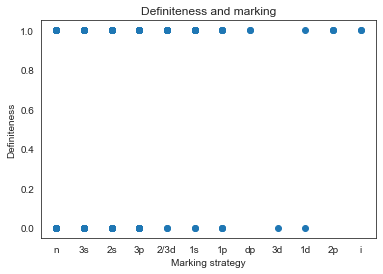

In [153]:
# PLOTS

# plot 1
c.execute("select PHI, DEF from texts") # Return all NPs' PHI and DEF values
X = []
Y = []
for item in c.fetchall(): # Make two distinct sets, the first containing PHI values, the second containing DEF values
    new_X = item[0]
    new_Y = item[1]
    X.append(new_X)
    Y.append(new_Y)

plt.scatter(X, Y) # changing the color, adding labels
plt.title('Definiteness and marking') # the title
plt.ylabel('Definiteness')
plt.xlabel('Marking strategy')
plt.show()

*We don't see any interesting results here, that we didn't see before, but once we fix the issues discussed above, there should be no dot at x = '2s' and y = 0.*

*Let's plot the frequencies of these strategies for definites and for indefinites.*

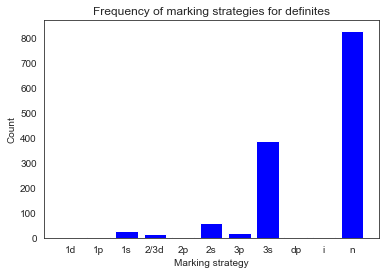

In [154]:
# plot 2
c.execute("select PHI, count(PHI) from texts where DEF = 1 group by PHI") # Return all definite NPs' PHI values and PHI counts
X = []
Y = []
for item in c.fetchall(): # Make two distinct sets, the first containing PHI values, the second containing PHI counts
    new_X = item[0]
    new_Y = item[1]
    Y.append(new_Y)
    X.append(new_X)

plt.bar(X, Y, color='blue')
plt.title('Frequency of marking strategies for definites')
plt.ylabel('Count')
plt.xlabel('Marking strategy')
plt.show()

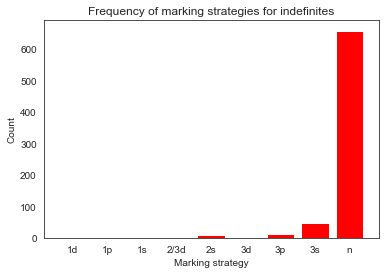

In [155]:
# plot 3
c.execute("select PHI, count(PHI) from texts where DEF = 0 group by PHI") # Return all indefinite NPs' PHI values and PHI counts
X = []
Y = []
for item in c.fetchall(): # Make two distinct sets, the first containing PHI values, the second containing PHI counts
    new_X = item[0]
    new_Y = item[1]
    Y.append(new_Y)
    X.append(new_X)

plt.bar(X, Y, color='red')
plt.title('Frequency of marking strategies for indefinites')
plt.ylabel('Count')
plt.xlabel('Marking strategy')
plt.show()

*Again, we can see that for indefinites the clearly preferred strategy is the unmarked one, while for definites there is a preference for the unmarked one too, but POSS.3SG marking is also quite frequent.*

*Overall, we can see that possessive marking does not necessarily mark definiteness.*

*Another parameter that we have not concerned ourselves with before is the type of relation denoted by the possessive. Let's plot them to see which ones are most frequent.*

*We can expect that non-possessive "discourse" possessive marking (labeled "dis" in our data) will be more frequent (as it is expected to deal with rather frequent notions such as definiteness or familiarity or discourse prominence) than all other (proper possessive) marking (bod — body part, fam — relative, rel — social relations, prt — part-whole, own — ownership, oth — other proper possessive relations).*

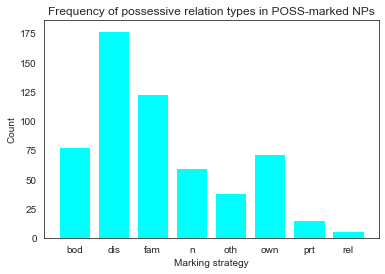

In [156]:
# plot 4
c.execute("select SEM, count(SEM) from texts where PSS = 1 group by SEM") # Return all POSS-marked NPs' SEM values and SEM counts
X = []
Y = []
for item in c.fetchall(): # Make two distinct sets, the first containing SEM values, the second containing SEM counts
    new_X = item[0]
    new_Y = item[1]
    Y.append(new_Y)
    X.append(new_X)

plt.bar(X, Y, color='cyan')
plt.title('Frequency of possessive relation types in POSS-marked NPs')
plt.ylabel('Count')
plt.xlabel('Marking strategy')
plt.show()

*Indeed, we find that non-possessive possessive marking is the most frequent one, although, family relations marking ("fam") is also quite frequent.*

## New Plots

Let's now compare the distributions of "non-possessive" POSS.2SG or POSS.3SG marked NPs in different texts. We expected that there will be no significant differences, since whathever the factors determining such non-possessive markings are — be it anaphoric accessibility of NP referents, topicality in whatever sense, specificity, etc. — they are expected to be roughly the same for long enough texts. (But not for very short texts, which are obviously not representative.) 

(NB: no statistical counts are done at this point, so our judgement is necessarily intuitive and preliminary and, therefore, should be taken with a grain of salt.)

In [157]:
import seaborn as sns
import pandas as pd

In [158]:
# NEW: create a dataframe with markings and marking counts for each text
phi_count = {'Text': [], 'Marking': [], 'Count': []}
for n in tab_num:
    tabcom = "select PHI, count(PHI) from text%s where (SEM = 'dis' or SEM = 'n') AND (PHI = '2s' or PHI = '3s' or PHI = 'n') group by PHI" % n  # Return all 2SG.POSS or 3SG.POSS or un-marked NPs' PHI values and PHI counts
    c.execute(tabcom)
    text = '%s' % n
    for row in c.fetchall():
        phi_count['Text'].append(text)
        phi_count['Marking'].append(row[0])
        phi_count['Count'].append(row[1])

df = pd.DataFrame(phi_count)
df

,Text,Marking,Count
0,1,3s,3
1,1,n,32
2,2,2s,1
3,2,3s,43
4,2,n,221
5,3,2s,1
6,3,n,27
7,4,n,13
8,5,3s,4
9,5,n,102


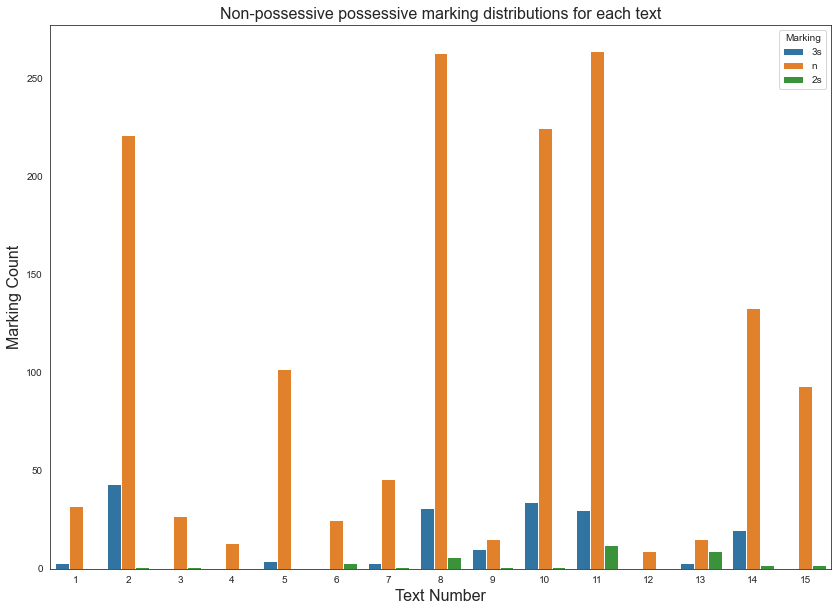

In [159]:
# NEW: plot 5

sns.set_context({"figure.figsize": (14, 10)})

sns.barplot(x="Text", y="Count", hue='Marking', data=df)
plt.title('Non-possessive possessive marking distributions for each text').set_fontsize(16)
plt.xlabel('Text Number').set_fontsize(16)
plt.ylabel('Marking Count').set_fontsize(16)

We can see that texts №№ 1, 2, 8, 10, 11, and 14 behave roughly the same w. r. t. POSS.3SG/n marking, while № 5 has a visibly lesser POSS.3SG/n ratio (as compared *e.g.* to 14), № 9 has a visibly higher POSS.3SG/n ratio, and №№ 3, 4, 6, 12, 15 appear to have no POSS.3SG marking at all. It's interesting to see whether this difference is derived from a difference in some objective factors such as *e.g.* amount of partitive specific contexts, or the difference is purely text- (speaker-) dependent.

POSS.2SG marking seem to be scarce and rather differently distributed in different texts. The amount of POSS.2SG marking in № 13 seems way higher than in №№ 11 or 8 if we consider percentages, while in №№ 1, 4, 5, and 12 there seems to be no POSS.2SG marked NPs.

Let's also consider a stacked bar chart with percentages to see whether our ratio observations are correct. For this purpose we have to create another database with counts for each marking type in separate columns.

At this point I had to go a little crazy with "if else" statements, but in the end I made it work.

In [160]:
# NEW: create a dataframe with counts for each marking type in separate columns

sep_phi = {'Text': [], 'Unmarked': [], 'POSS2SG': [], 'POSS3SG': []}

i = 0 # this variable tracks rows in the original dataframe
n = 1 # this variable tracks rows in the new dataframe
for x in phi_count['Text']:
    if i < 36: # for some reason without this "if else" statement I get a "list index out of range" error at some point, so I just leave it be, since it works
        sep_phi['Text'].append(n)
        # the following set of "if else" statements check whether the count in this row is for a particular type of marking
        # if not, then we add a 0 to our new database for the count of this type of marking for the given text and move on in the same fashion
        # along the way we increment i appropriately or if a zero must be inputed we don't increment it
        if phi_count['Marking'][i] == '2s':
            sep_phi['POSS2SG'].append(phi_count['Count'][i])
            i = i + 1
            if phi_count['Marking'][i] == '3s':
                sep_phi['POSS3SG'].append(phi_count['Count'][i])
                i = i + 1
            else:
                sep_phi['POSS3SG'].append(0)
            sep_phi['Unmarked'].append(phi_count['Count'][i])
            i = i + 1
            n = n + 1
        else:
            sep_phi['POSS2SG'].append(0)
            if phi_count['Marking'][i] == '3s':
                sep_phi['POSS3SG'].append(phi_count['Count'][i])
                i = i + 1
            else:
                sep_phi['POSS3SG'].append(0)
            sep_phi['Unmarked'].append(phi_count['Count'][i])
            i = i + 1
            n = n + 1
    else:
        break

df2 = pd.DataFrame(sep_phi)
df2

,Text,Unmarked,POSS2SG,POSS3SG
0,1,32,0,3
1,2,221,1,43
2,3,27,1,0
3,4,13,0,0
4,5,102,0,4
5,6,25,3,0
6,7,46,1,3
7,8,263,6,31
8,9,15,1,10
9,10,225,1,34


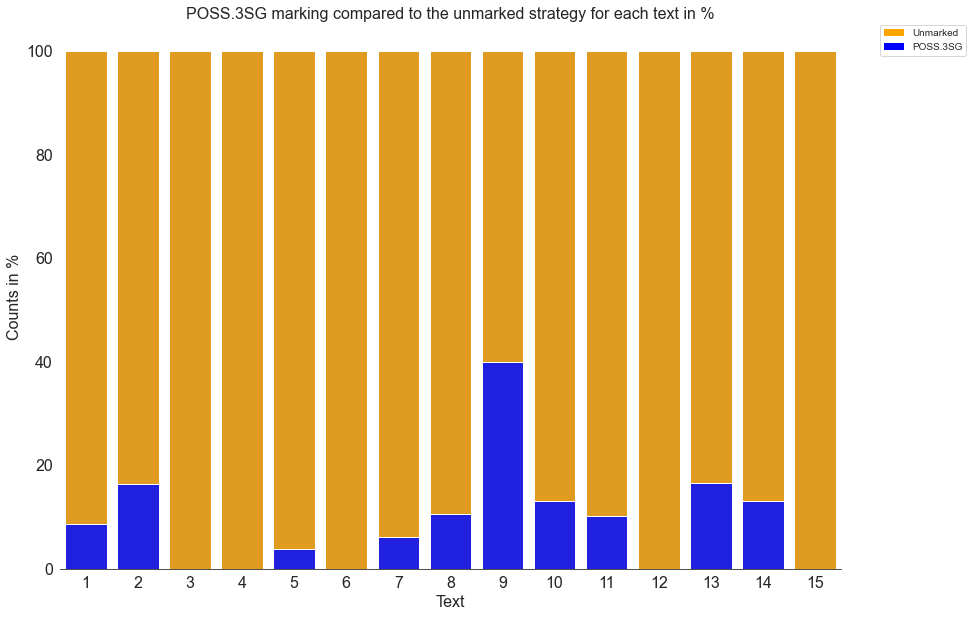

In [161]:
# NEW: plot 6

#Create total column and percentage variants for unmarked
df2["TotPer"] = 100
df2["P3SPer"] = (df2.POSS3SG / (df2.Unmarked + df2.POSS3SG)) * 100

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (14, 10)})

#Plot 1 - background - "unmarked + POSS.3SG" (essentially giving the unmarked part of each bar)
mid_plot = sns.barplot(x = df2.Text, y = df2.TotPer, color = "orange")

#Plot 2 - overlay 2 - POSS.3SG part of each bar
bottom_plot = sns.barplot(x = df2.Text, y = df2.P3SPer, color = "blue")

# Legend
midbar = plt.Rectangle((0,0),1,1,fc="blue", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='orange',  edgecolor = 'none')
l = plt.legend([bottombar, midbar], 
               ['Unmarked', 'POSS.3SG'], 
               ncol = 1, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
l.draw_frame(True)

# Title
plt.title('POSS.3SG marking compared to the unmarked strategy for each text in %').set_fontsize(16)

sns.despine(left=True)
bottom_plot.set_xlabel("Text")
bottom_plot.set_ylabel("Counts in %")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

On this plot the percentage of POSS.3SG marking in № 5 doesn't seem as different from other №№, where such marking is present. On the other hand, here we can again see that № 9 indeed has excessive POSS.3SG marking. №№ 3, 4, 6, 12, 15 indeed have no POSS.3SG marking, which has to be explained in future work.

Now let's turn to POSS.2SG marking.

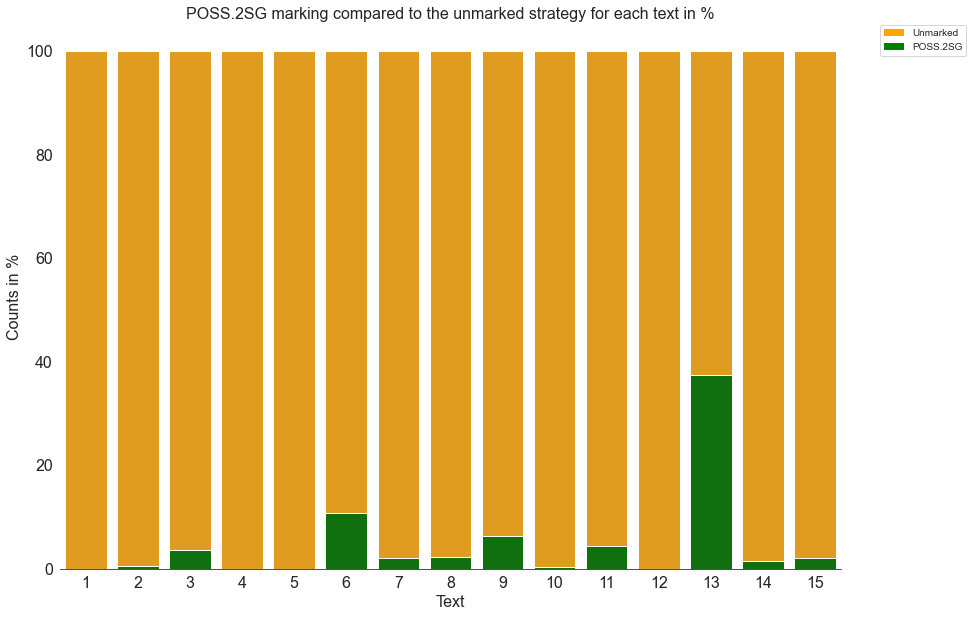

In [162]:
# NEW: plot 7

#Create total column and percentage variants for unmarked
df2["TotPer"] = 100
df2["P2SPer"] = (df2.POSS2SG / (df2.Unmarked + df2.POSS2SG)) * 100

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (14, 10)})

#Plot 1 - background - "unmarked + POSS.2SG" (essentially giving the unmarked part of each bar)
mid_plot = sns.barplot(x = df2.Text, y = df2.TotPer, color = "orange")

#Plot 2 - overlay 2 - POSS.2SG part of each bar
bottom_plot = sns.barplot(x = df2.Text, y = df2.P2SPer, color = "green")

# Legend
midbar = plt.Rectangle((0,0),1,1,fc="green", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='orange',  edgecolor = 'none')
l = plt.legend([bottombar, midbar], 
               ['Unmarked', 'POSS.2SG'], 
               ncol = 1, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
l.draw_frame(True)

# Title
plt.title('POSS.2SG marking compared to the unmarked strategy for each text in %').set_fontsize(16)

sns.despine(left=True)
bottom_plot.set_xlabel("Text")
bottom_plot.set_ylabel("Counts in %")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

It's clear that overall POSS.2SG marking is less frequent than POSS.3SG marking. On this plot the distribution doesn't seem more chaotic as compared to POSS.3SG. №№ 1, 4, 5, and 12 indeed have no POSS.2SG marking, which will also have to be explained in future work.

Note that № 12 is the only text in which both kinds of marking are absent. Thus, the present data speak against the hypothesis according to which some texts (speakers) disprefer non-possessive possessive marking generally — the presence of POSS.2SG marking is independent from the presence of POSS.3SG marking. This raises my hopes that the distributions of such POSSs in texts dependend on some objective factors, as suggested above.

In [163]:
conn.close()